## ANALISIS DE SENTIMIENTOS CONTEXTO PERU

## Librerias

In [381]:
#import warnings
#warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

#NLTK
import nltk
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize
from nltk import word_tokenize, WordPunctTokenizer, regexp_tokenize

#Plotting 
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

#Keras
from numpy import array
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding

In [382]:
#Funcion para cambiar valores de polaridad
def Cambiar_valor_polaridad(x):
    result = 0
    if x == 'POS':
        result = 1
    elif x == 'NEG':
        result = 0
    elif x == 'NEU':
        result =  -1
    return result

def Cambiar_formato(x):
    #print(x)
    result = ''
    if x == '0.0' or x == '0' :
        result = 'NEG'
    elif x == '1.0' or x == '1':
        result = 'POS'
    elif x == '-':
        result = 'NEU'
        
    return result

# DATASET PROPIO

In [826]:
from sklearn.model_selection import train_test_split
df = pd.read_csv("df_politico_score.csv")
print(df.columns)
#df['target'] = df['target'].apply(lambda x: Cambiar_formato(x))
#df = df[['id','tweet','sentimiento']]
#df.to_csv("DF_politicoVM.csv")
#print(df.sentimiento.value_counts())
##print(df)
#df = df[(df['target_final'] == 'POS') | (df['target_final'] == 'NEG')]
#print(df.target_final.value_counts())
df = df[['id','tweet','target']]
df = df[(df['target'] == 'POS') | (df['target'] == 'NEG')]
df.columns =['id','tweet','target']
print(df.columns)
print(df.target.value_counts())
#df['polarity_value'] = df['target'].apply(lambda x: Cambiar_valor_polaridad(x))
#df = df[df['target'].isin(['POS','NEG','NEU'])]
#X_train, X_test, y_train, y_test = train_test_split(df[['id','tweet','target']], df['target'], stratify=df['target'], test_size=0.30)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'id', 'tweet',
       'tweet_sentence', 'len_sentence', 'username', 'date', 'nlikes',
       'tweet_word', 'len_word', 'POS', 'NEG', 'NEU', 'target'],
      dtype='object')
Index(['id', 'tweet', 'target'], dtype='object')
NEG    2347
POS    1470
Name: target, dtype: int64


In [823]:
df.to_excel('TweetsE.xlsx')

In [824]:
df = pd.read_csv("DF_politicoE.csv")
#df['target'] = df['targt'].apply(lambda x: Cambiar_formato(x))
#df = df[['id','tweet','sentimiento']]
#df.to_csv("DF_politicoVM.csv")
#print(df.sentimiento.value_counts())
#print(df)
df = df[df['target'].isin(['POS','NEG'])]
print(df.target.value_counts())

NEG    1775
POS     885
Name: target, dtype: int64


In [825]:
#X_train, X_test, y_train, y_test = cross_validation.train_test_split(Data, Target, test_size=0.3, random_state=0, stratify=Target)

# Processing Tweets

Merge both datasets for pre-processing.

In [827]:
#processed_tweets= pd.concat([pd.DataFrame({'tweetID':tweets.id, 'tweetText':tweets.tweet,'polarity_value':tweets.target, 'set':tweets.set}), 
#                             pd.DataFrame({'tweetID':train_set.tweet_id, 'tweetText':train_set.tweetText, 'polarity_value':train_set.polarity_value,'set':train_set.set})], ignore_index=True)
#processed_tweets= pd.concat([pd.DataFrame({'tweetID':df_pandemia_train.id, 'tweetText':df_pandemia_train.tweet,'polarity_value':df_pandemia_train.target, 'set':df_pandemia_train.set}),
#                             pd.DataFrame({'tweetID':df_pandemia_test.id, 'tweetText': df_pandemia_test.tweet, 'polarity_value':df_pandemia_test.target,'set':df_pandemia_test.set})], ignore_index=True)
processed_tweets = df.copy()
processed_tweets['processed_tweet'] = df.tweet
#processed_tweets['processed_tweet'] = processed_tweets.tweetText
processed_tweets.sample(4)

,id,tweet,target,processed_tweet
140,1.453153e+18,"Como #GobiernoDelPueblo, somos y seremos respe...",POS,"Como #GobiernoDelPueblo, somos y seremos respe..."
2687,1.412395e+18,"Mi saludo, respeto y reconocimiento a los #Doc...",POS,"Mi saludo, respeto y reconocimiento a los #Doc..."
2527,1.276297e+18,Acabamos de manifestarle al vicepresidente del...,NEG,Acabamos de manifestarle al vicepresidente del...
3866,1.281987e+18,Saludo a todos los #DocentesUniversitarios que...,POS,Saludo a todos los #DocentesUniversitarios que...


### Hashtags

In [828]:
import re
hash_regex = re.compile(r"#(\w+)")
hstgs = [] # To store the hashtags so we can exclude them from some parts of the analysis
def hash_repl(match):
    _ = '__HASH_'+match.group(1).upper()
    hstgs.append(_)
    return _

### User names

In [829]:
user_regex = re.compile(r"@(\w+)")
usr_names = [] # To store the user names so we can exclude them from some parts of the analysis
def user_repl(match):
    _ = '__user_'+match.group(1).upper()
    usr_names.append(_)
    return _

### URLs

In [830]:
url_regex = re.compile(r"(http|https|ftp)://[a-zA-Z0-9\./]+")
def url_repl(match):
    return '__URL_'

In [831]:
#processed_tweets['processed_tweet'] = [re.sub(url_regex, url_repl, str(s)) for s in processed_tweets.processed_tweet]
#processed_tweets

### Reppppppppetitions

In [832]:
# Repeating words like hurrrryyyyyy
rpt_regex = re.compile(r"(.)\1{1,}", re.IGNORECASE);
def rpt_repl(match):
    return match.group(1)+match.group(1)

In [833]:
# Test
re.sub(rpt_regex, rpt_repl, "Reppppeated characters in wordsssssssss" )

'Reppeated characters in wordss'

### Punctuation

In [834]:
# Spliting by word boundaries
word_bound_regex = re.compile(r"\W+")

# Punctuations
punctuations = \
	[	#('',		['.', ] )	,\
		#('',		[',', ] )	,\
		#('',		['\'', '\"', ] )	,\
		('__PUNC_EXCL',		['!', '¡', ] )	,\
		('__PUNC_QUES',		['?', '¿', ] )	,\
		('__PUNC_ELLP',		['...', '…', ] )	,\
	]

#For punctuation replacement
def punctuations_repl(match):
	text = match.group(0)
	repl = []
	for (key, parr) in punctuations :
		for punc in parr :
			if punc in text:
				repl.append(key)
	if( len(repl)>0 ) :
		return ' '+' '.join(repl)+' '
	else :
		return ' '

In [835]:
processed_tweets['processed_tweet'] = [re.sub(word_bound_regex, punctuations_repl, str(s)) for s in processed_tweets.processed_tweet]

### Stemming
As there is no spanish language for PorterStemmer, go with snowball!

In [836]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('spanish')

In [837]:
# Test
text = processed_tweets.processed_tweet[213]
print(text)
text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if ((len(word) >= 3) and (word not in usr_names))]
text = [stemmer.stem(w) for w in text]                
text = " ".join(text)
print('------------------')
print(text)

KeyError: 213

In [838]:
def sb_stem(text, only_first=0):
    text = [word if(word[0:2]=='__') else word.lower() for word in text.split() if ((len(word) >= 3) or (word in ['no','si', 'sí', 'ni']))] #   If we are doing negation analysis, maybe is a better idea to keep the small words (like 'no')
    text = [stemmer.stem(w) if w[0:2]!='__' else w for w in text ]
    
    return(text)

In [839]:
processed_tweets['processed_tweet'] = processed_tweets.processed_tweet.apply(sb_stem)

In [840]:
def processAll(text):
    text = re.sub( hash_regex, hash_repl, text )
    text = re.sub( user_regex, user_repl, text)
    text = re.sub( url_regex, url_repl, text )
    
    text = text.replace('\'','')
    
    text = re.sub( word_bound_regex , punctuations_repl, text )
    text = re.sub( rpt_regex, rpt_repl, text )
    
    text = sb_stem(text)    
    return text

### Process tweets

Now we can process the tweets with the recently created functions

In [841]:
processed_tweets['processed_tweet'] = processed_tweets.tweet.apply(processAll)

In [842]:
#check
#processed_tweets.sample(4)

In [843]:
processed_tweets

,id,tweet,target,processed_tweet
0,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,..."
1,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,..."
2,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,..."
3,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,..."
4,1.361684e+18,"Seamos claros: estás décadas de traición, corr...",NEG,"[seam, clar, estas, dec, traicion, corrupcion,..."
...,...,...,...,...
6369,1.531074e+18,Agradecemos el saludo de la @ACTransparencia p...,POS,"[agradec, salud, __user_ACTRANSPARENCIA, por, ..."
6370,1.531074e+18,Agradecemos el saludo de la @ACTransparencia p...,POS,"[agradec, salud, __user_ACTRANSPARENCIA, por, ..."
6375,1.542233e+18,"En entrevista a #JNETV, Mariani señaló que lo ...",NEG,"[entrev, __HASH_JNETV, mariani, señal, que, qu..."
6376,1.542167e+18,"Según el docente universitario, ""ejecutivo y l...",NEG,"[segun, docent, universitari, ejecut, legisl, ..."


## Feature Creation

### Emoticons

Emojis on the Spanish tweets, unlike on the Colombian ones, are stored as combinations of characters, such as :) . We will try to put them all on the same page for the feature engineering. That is, we will translate them to their Unicode value. Let's begin with the spanish ones.

In [844]:
# Emoticons
emoticons = \
	[	# For __EMOT_SMILEY
        (' __emoji: U+1F601',	[':-)', ':)', '(:', '(-:', ] )	,\
        # for __EMOT_LAUGH
		(' __emoji: U+1F923',		[':-D', ':D', 'X-D', 'XD', 'xD', ] )	,\
        # For __EMOT_LOVE
		(' __emoji: U+2764',		['<3', ':\*', ] )	,\
        # For __EMOT_WINK
		('__emoji: U+1F609',		[';-)', ';)', ';-D', ';D', '(;', '(-;', ] )	,\
        # For __EMOT_FROWN
		(' __emoji: U+2639',		[':-(', ':(', '(:', '(-:', ] )	,\
        # For __EMOT_CRY
		(' __emoji: U+1F622',		[':,(', ':\'(', ':"(', ':(('] )	,\
	]
    
def escape_paren(arr):
	return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

def regex_union(arr):
	return '(' + '|'.join( arr ) + ')'

emoticons_regex = [ (repl, re.compile(regex_union(escape_paren(regx))) ) for (repl, regx) in emoticons ]

In [845]:
# Test
text = "This is a text with one emoticon :) and another :("
for (repl, regx) in emoticons_regex :
    text = re.sub(regx, ' '+repl+' ', text)
    
print(text)

This is a text with one emoticon   __emoji: U+1F601  and another   __emoji: U+2639 


Now we can do something similar for the Colombian tweets, we will translate them to their respective  unicode values:

In [846]:
# data scraped from http://www.unicode.org/emoji/charts/full-emoji-list.html
emojis_db=pd.read_csv('emojis_db_csv.csv')
emojis_db.head()

,emoji_category,number,code,CLDR_Short_Name
0,face-positive,1,U+1F600,grinning face
1,face-positive,2,U+1F601,beaming face with smiling eyes
2,face-positive,3,U+1F602,face with tears of joy
3,face-positive,4,U+1F923,rolling on the floor laughing
4,face-positive,5,U+1F603,grinning face with big eyes


In [847]:
emojis_db.emoji_category.unique()

array(['face-positive', 'face-neutral', 'face-negative', 'face-sick',
       'face-role', 'face-fantasy', 'cat-face', 'monkey-face', 'person',
       'person-role', 'person-fantasy', 'person-gesture',
       'person-activity', 'person-sport', 'family', 'body', 'hair-style',
       'emotion', 'clothing', 'animal-mammal', 'animal-bird',
       'animal-amphibian', 'animal-reptile', 'animal-marine',
       'animal-bug', 'plant-flower', 'plant-other', 'food-fruit',
       'food-vegetable', 'food-prepared', 'food-asian', 'food-sweet',
       'drink', 'dishware', 'place-map', 'place-geographic',
       'place-building', 'place-religious', 'place-other',
       'transport-ground', 'transport-water', 'transport-air', 'hotel',
       'time', 'sky & weather', 'event', 'award-medal', 'sport', 'game',
       'arts & crafts', 'sound', 'music', 'musical-instrument', 'phone',
       'computer', 'light & video', 'book-paper', 'money', 'mail',
       'writing', 'office', 'lock', 'tool', 'science', 'medi

Emojis present on tweets on the colombian dataset are encoded as the actual emoji image, the following function will extract the unicode from each emoji so we can use it as a feature.

In [848]:
def emojis_unicode(tweet):
    ''' Extracts the emojis on the tweet on Unicode format, also tries to match those in regular format, such as ";)" '''
    for (repl, regx) in emoticons_regex :
        tweet = re.sub(regx, ' '+repl+' ', tweet)
#     print(tweet)

    tweet_unicode = str(tweet.encode('unicode-escape'))
    tweet_unicode = tweet_unicode.replace('\\\\U000',' __emoji: U+')
#     print(tweet_unicode)
    
    emoji_list = []
#     print(tweet)
    for emoji in range(tweet_unicode.count(' __emoji: ')):
        em = tweet_unicode.split('__emoji: ')[emoji+1].split()[0]
        em = em[:7] # the len of the emoji in unicode is between 6 and 7
        emoji_list.append(em.upper())
    return emoji_list

In [849]:
# Test
text = "This is a text with one emoticon :) and another :( and some others: 😡 🤣😂"
emojis_unicode(text)

['U+1F601', 'U+2639', 'U+1F621', 'U+1F923', 'U+1F602']

In [850]:
processed_tweets['emojis_unicode'] = processed_tweets.tweet.apply(emojis_unicode) # np.vectorize(emojis_unicode)(processed_tweets['tweetText'])

Now we can get the category of the extracted emojis

In [851]:
def emoji_category(emojis):
    categories = []
    for i in range(len(emojis)):
        # print(emojis[i])
        try:
            categories.append(emojis_db.loc[emojis_db.code == emojis[i]].emoji_category.values[0])
        except:
            try:
                _ = emojis[i].split('+')[1] + '+'
                categories.append(emojis_db[emojis_db.code.str.contains(_)].emoji_category.values[0])
            except:
                categories.append('other')
    if len(categories) < 1:
        categories.append('no_emojis')
    return categories

emoji_category(emojis_unicode(text))

['face-positive',
 'face-negative',
 'face-negative',
 'face-positive',
 'face-positive']

In [852]:
processed_tweets['emojis_categories'] = processed_tweets.emojis_unicode.apply(emoji_category)

In [853]:
processed_tweets.head()

,id,tweet,target,processed_tweet,emojis_unicode,emojis_categories
0,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis]
1,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis]
2,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis]
3,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis]
4,1.361684e+18,"Seamos claros: estás décadas de traición, corr...",NEG,"[seam, clar, estas, dec, traicion, corrupcion,...",[],[no_emojis]


### N-grams

In [854]:
# Unigrams
unigrams_fd = nltk.FreqDist()
# unigrams_fd.update(text)
# unigrams_fd

# Bigrams
# words_bi  = [ ','.join(map(str,bg)) for bg in nltk.bigrams(text) ]
bi_grams_fd = nltk.FreqDist()
# bi_grams_fd.update( words_bi )
# bi_grams_fd

# Trigrams
# words_tri  = [ ','.join(map(str,tg)) for tg in nltk.trigrams(text) ]
tri_grams_fd = nltk.FreqDist()
# tri_grams_fd.update( words_tri )
# tri_grams_fd

In [855]:
# Wrapper function that encloses all the n-grams procedures
def get_word_features(words):
    bag = {}
    words_uni = [ 'has(%s)'% ug for ug in words ]
    words_bi  = [ 'has(%s)'% ','.join(map(str,bg)) for bg in nltk.bigrams(words) ]
    words_tri = [ 'has(%s)'% ','.join(map(str,tg)) for tg in nltk.trigrams(words) ]
    
    for f in words_uni+words_bi+words_tri:
        bag[f] = 1

    return bag

### Negation

In [856]:
sb_stem('nunca no nada ningún ninguno ninguna tampoco')

['nunc', 'no', 'nad', 'ningun', 'ningun', 'ningun', 'tampoc']

In [857]:
negtn_regex = re.compile( r"""(?:
    ^(?:nunca|no|nada|ningún|ninguno|ninguna|tampoco|
        nunc|nad|ningun|tampoc
    )$
)
|
n't
""", re.X)

def get_negation_features(words):
    INF = 0.0
    negtn = [ bool(negtn_regex.search(w)) for w in words ]

    left = [0.0] * len(words)
    prev = 0.0
    for i in range(0,len(words)):
        if( negtn[i] ):
            prev = 1.0
        left[i] = prev
        prev = max( 0.0, prev-0.1)

    right = [0.0] * len(words)
    prev = 0.0
    for i in reversed(range(0,len(words))):
        if( negtn[i] ):
            prev = 1.0
        right[i] = prev
        prev = max( 0.0, prev-0.1)

    return dict( zip(
                    ['neg_l('+w+')' for w in  words] + ['neg_r('+w+')' for w in  words],
                    left + right ) )

In [858]:
# Test
text = ["Este","tweet", "no", "es", "positivo"]
get_negation_features(text)

{'neg_l(Este)': 0.0,
 'neg_l(tweet)': 0.0,
 'neg_l(no)': 1.0,
 'neg_l(es)': 0.9,
 'neg_l(positivo)': 0.8,
 'neg_r(Este)': 0.8,
 'neg_r(tweet)': 0.9,
 'neg_r(no)': 1.0,
 'neg_r(es)': 0.0,
 'neg_r(positivo)': 0.0}

### Polarity

We tried using the spanish sentiment lexicon from http://www.opener-project.eu/ but it didn't improve the results on any of the algorithms. Maybe due to the fact that spanish from Spain is different from the spanish spoken in Colombia.

In [859]:
opener_lexicon = pd.read_csv('https://raw.githubusercontent.com/opener-project/public-sentiment-lexicons/master/propagation_lexicons/es/es.lemma.sy.an.hypo.rels.maxdepth5.seed500.maj.gold.csv', sep=';', header=None)
opener_lexicon.columns = ['x','pos', 'polarity', 'xx','word','xxx']
opener_lexicon.head()

,x,pos,polarity,xx,word,xxx
0,unknown,n,positive,1.0,felicitación,1
1,unknown,a,negative,1.0,inconsciente,1
2,unknown,n,neutral,1.0,soporte,1
3,unknown,n,neutral,1.0,proceso_matemático,1
4,unknown,v,positive,1.0,manifestar,1


As the meaning of columns 4 and 6 is not known by us at the moment, they won't be included on the analysis.

In [860]:
def get_sent(polarity):
    if polarity == 'neutral':
        return 0
    if polarity == 'negative':
        return -1
    if polarity == 'positive':
        return 1
opener_lexicon['sentiment'] = opener_lexicon.polarity.apply(get_sent)

In [861]:
opener_lexicon['stmd_word'] = opener_lexicon['word'].apply(sb_stem)
opener_lexicon['stmd_word'] = opener_lexicon.stmd_word.apply(lambda x: str(x).replace('[','').replace(']','').replace("'",''))
opener_lexicon = opener_lexicon[['word','stmd_word','sentiment']]
opener_lexicon = opener_lexicon.loc[opener_lexicon.sentiment != 0]
opener_lexicon = opener_lexicon.drop_duplicates()
opener_lexicon.sample(4)

,word,stmd_word,sentiment
8875,schizopetalon,schizopetalon,1.0
2863,cubrir_de_tablillas,cubrir_de_tablill,1.0
10087,excrecencia,excrecent,-1.0
839,débil,debil,-1.0


In [862]:
def get_polarity_features(text):
    pol = {}
    text = sb_stem(text)
    for word in text:
        try:
            pol["sent("+word+")"] = opener_lexicon.loc[opener_lexicon.stmd_word == word].sentiment.values[0]
        except:
            continue
            
    return pol

#_ = processed_tweets.tweet[10]
#print('Tweet ',_)
#print('Would have the following words and sentiments associated:')
#print(get_polarity_features(_))

### Apply Features

In [863]:
# Wrapper function for the extraction of features
def extract_features(text):
    global usr_names, hstgs
    features = {}
    words = text
    words = processAll(text)

    word_features = get_word_features(words)
    features.update( word_features )

    negation_features = get_negation_features(words)
    features.update( negation_features )
    
    # Sentiment features are not included on the final deliverabe as did not improve results
#     sentiment_features = get_polarity_features(text)
#     features.update(sentiment_features )
    
    emoji_features = emoji_category(emojis_unicode(text))
    emoji_features_dic = dict( zip(['emoji_('+w+')' for w in  emoji_features], emoji_features))
    features.update( emoji_features_dic )
    
    usr_names = list(set(usr_names))
    hstgs = list(set(hstgs))
    return features

In [891]:
processed_tweets['processed_tweet_features'] = processed_tweets.tweet.apply(extract_features)

In [892]:
processed_tweets.head()

,id,tweet,target,processed_tweet,emojis_unicode,emojis_categories,processed_tweet_features
0,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis],"{'has(polit)': 1, 'has(com)': 1, 'has(vizcarr)..."
1,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis],"{'has(polit)': 1, 'has(com)': 1, 'has(vizcarr)..."
2,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis],"{'has(polit)': 1, 'has(com)': 1, 'has(vizcarr)..."
3,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,NEG,"[polit, com, vizcarr, gent, confianz, confirm,...",[],[no_emojis],"{'has(polit)': 1, 'has(com)': 1, 'has(vizcarr)..."
4,1.361684e+18,"Seamos claros: estás décadas de traición, corr...",NEG,"[seam, clar, estas, dec, traicion, corrupcion,...",[],[no_emojis],"{'has(seam)': 1, 'has(clar)': 1, 'has(estas)':..."


In [866]:
processed_tweets.processed_tweet_features[10]

KeyError: 10

In [ ]:
#processed_tweets.set.value_counts()

In [ ]:
processed_tweets

In [898]:
import random
import statistics
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score

fold = 5
index = list(range(0,len(processed_tweets) - 1))
list_index = random.sample(index, fold)

list_acur = []
for i in list_index:
    X_train, X_test, y_train, y_test = train_test_split(processed_tweets[['id','tweet','processed_tweet','processed_tweet_features']], 
                                                    processed_tweets['target'], stratify=processed_tweets['target'], random_state= i, test_size=0.30)
    
    train_ = X_train
    train_['target'] = y_train
    
    test_ = X_test
    test_['target'] = y_test
    
    train_size = int(train_.shape[0]*0.8)
    sentiment_train_tweets = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[:train_size]]
    sentiment_train_tweets_full = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[:train_size]]
    sentiment_validation_tweets = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[train_size:]]
    sentiment_test_tweets  = [(tweet, sentiment) for tweet, sentiment in test_[['tweet', 'target']].values]
    
    v_train = nltk.classify.apply_features(extract_features,sentiment_train_tweets)
    v_train_full = nltk.classify.apply_features(extract_features,sentiment_train_tweets_full)
    v_validation = nltk.classify.apply_features(extract_features,sentiment_validation_tweets)
    v_test  = nltk.classify.apply_features(extract_features,sentiment_test_tweets)
    #print(extract_features)
    #print(v_train)
    print('Results Fold ', i)
    nb_classifier = nltk.classify.NaiveBayesClassifier
    #nb_classifier = nltk.classify.SklearnClassifier(MultinomialNB())
    nb_class = nb_classifier.train(v_train)
    #print(v_validation)
    print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_validation))
    
    test_predict = [nb_class.classify(t) for (t,s) in v_test]
    acuracia = accuracy_score(y_test, test_predict)
    print('accuracia', acuracia)
    list_acur.append(acuracia)

#print(statistics.mean(list_acur))

Results Fold  1071
Accuracy of the model =  0.9700934579439252
accuracia 0.9773123909249564
Results Fold  114
Accuracy of the model =  0.9738317757009346
accuracia 0.9781849912739965
Results Fold  1494
Accuracy of the model =  0.9794392523364486
accuracia 0.9712041884816754
Results Fold  1682
Accuracy of the model =  0.9813084112149533
accuracia 0.9773123909249564
Results Fold  1569
Accuracy of the model =  0.9738317757009346
accuracia 0.9764397905759162


# Part 1: Classification - Sentiment Analysis

In [897]:
X_train, X_test, y_train, y_test = train_test_split(processed_tweets[['id','tweet','processed_tweet','processed_tweet_features']], 
                                                    processed_tweets['target'], stratify=processed_tweets['target'], test_size=0.30)

In [ ]:
#train_ = processed_tweets.loc[processed_tweets.set == 'train']
#test_ = processed_tweets.loc[processed_tweets.set == 'test']
print(len(X_train),len(X_test))

In [ ]:
train_ = X_train
train_['target'] = y_train

In [98]:
test_ = X_test
test_['target'] = y_test

In [99]:
len(train_)

1862

In [100]:
len(test_)

798

In [101]:
train_size = int(train_.shape[0]*0.8)
sentiment_train_tweets = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[:train_size]]
sentiment_train_tweets_full = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[:train_size]]
sentiment_validation_tweets = [(tweet, sentiment) for tweet, sentiment in train_[['tweet', 'target']].values[train_size:]]
sentiment_test_tweets  = [(tweet, sentiment) for tweet, sentiment in test_[['tweet', 'target']].values]
#sentiment_train_tweets

## Data Preparation

In [102]:
# Apply the data processing and cleaning extraction methodologies
v_train = nltk.classify.apply_features(extract_features,sentiment_train_tweets)
v_train_full = nltk.classify.apply_features(extract_features,sentiment_train_tweets_full)
v_validation = nltk.classify.apply_features(extract_features,sentiment_validation_tweets)
v_test  = nltk.classify.apply_features(extract_features,sentiment_test_tweets)
print(len(v_train), len(v_train_full), len(v_validation), len(v_test))

1489 1489 373 798


In [103]:
len(v_test)

798

In [104]:
print ("For the tweet = ", train_.tweet.values[10] )
print (" ")
print ("The following features has been created:")
print (" ")
#print (v_train[0][0])

For the tweet =  Una vez más en la puerta de mi domicilio gritando e insultando, grupo de mujeres inescrupulosas con matones. Se violan nuestros derechos impunemente. Estamos en peligro, el ataque es reiterado. Estos grupos son bandas criminales y temerarias. No se debe esperar una desgracia.
 
The following features has been created:
 


## Multinomial 

In [105]:
nb_classifier =  nltk.classify.SklearnClassifier(MultinomialNB())
nb_class = nb_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_validation))

#nb_class = nb_classifier.train(v_train_full) 
test_predict = [nb_class.classify(t) for (t,s) in v_test]
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))
#print((test_predict),(y_test.to_list()))

Accuracy of the model =  0.9061662198391421
Accuracy of the model =  0.9085213032581454


## Bernoulli

In [66]:
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
nb_classifier =  nltk.classify.SklearnClassifier(BernoulliNB(alpha=1.0, binarize=1.0, fit_prior=False, class_prior=None))
nb_class = nb_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_validation))

#nb_class = nb_classifier.train(v_train_full) 
test_predict = [nb_class.classify(t) for (t,s) in v_test]
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))
#print((test_predict),(y_test.to_list()))

Accuracy of the model =  0.675603217158177
Accuracy of the model =  0.6666666666666666


## Logistic 

In [241]:
nb_classifier =  nltk.classify.SklearnClassifier(LogisticRegression())
nb_class = nb_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_validation))

#nb_class = nb_classifier.train(v_train_full) 
test_predict = [nb_class.classify(t) for (t,s) in v_test]
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))
#print((test_predict),(y_test.to_list()))


Accuracy of the model =  0.9222520107238605
Accuracy of the model =  0.8972431077694235


## Naive Bayes

In [69]:
nb_classifier = nltk.classify.NaiveBayesClassifier
nb_class = nb_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_validation))

Accuracy of the model =  0.9276139410187667


Accuracy looks good enough, we can try now to train on the whole set and run on the Colombian tweets

In [216]:
#nb_class = nb_classifier.train(v_train_full) 
test_predict = [nb_class.classify(t) for (t,s) in v_test]
#print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))
#print((test_predict),(y_test.to_list()))

In [223]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracia = accuracy_score(y_test.to_list(), test_predict)
precision = precision_score(y_test.to_list(), test_predict, average="binary", pos_label='POS')
recall = recall_score(y_test.to_list(), test_predict, average="binary", pos_label='POS')
f1 = f1_score(y_test.to_list(), test_predict, average="binary", pos_label='POS')
print(accuracia, precision, recall, f1)

0.918546365914787 0.8311258278145696 0.9471698113207547 0.8853615520282188


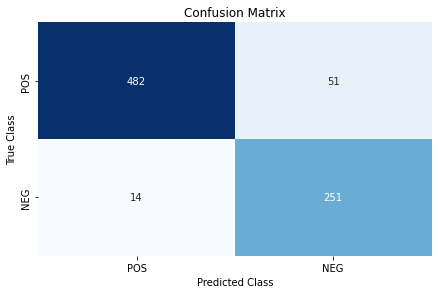

In [235]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
# crear matriz de confusión
class_names= ['POS', 'NEG']
matrix = confusion_matrix(y_test, test_predict)

# crear marco de datos de pandas Crear un conjunto de datos
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
#print((dataframe))
# crear mapa de calor dibujar mapa de calor
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt="d")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

## SVM

In [143]:
from sklearn.svm import LinearSVC
svm_classifier = nltk.classify.SklearnClassifier(LinearSVC())
svm_class = svm_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(svm_class, v_validation))

Accuracy of the model =  0.6886075949367089


In [144]:
#nb_class = nb_classifier.train(v_train_full) 
test_predict = [svm_class.classify(t) for (t,s) in v_test]
#print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))

In [145]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.6891252955082743

## Random Forest

In [146]:
from sklearn.ensemble import RandomForestClassifier
dt_classifier = nltk.classify.SklearnClassifier(RandomForestClassifier())
dt_class = dt_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(dt_class, v_validation))

Accuracy of the model =  0.6531645569620254


In [147]:
#nb_class = nb_classifier.train(v_train_full) 
test_predict = [dt_class.classify(t) for (t,s) in v_test]
#print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.6572104018912529

# Redes

In [149]:
from sklearn.neural_network import MLPClassifier
dt_classifier = nltk.classify.SklearnClassifier(MLPClassifier())
dt_class = dt_classifier.train(v_train)
#print(v_validation)
print ("Accuracy of the model = ", nltk.classify.accuracy(dt_class, v_validation))

C:\Users\claud\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:619: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Accuracy of the model =  0.7189873417721518


In [150]:
#nb_class = nb_classifier.train(v_train_full) 
test_predict = [dt_class.classify(t) for (t,s) in v_test]
#print ("Accuracy of the model = ", nltk.classify.accuracy(nb_class, v_test))

In [151]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, test_predict)

0.7115839243498818

There is no way to measure test accuracy as the colombian tweets are not labeled. Clearly, as our production set is a different kind of Spanish (Colombia Vs. Spain on the test set), classification score shouldn't be expected to be as high on this proof of concept, but here is a random sample for each label:

In [223]:
NB_results

,tweet,sentiment
0,"(@CIDH @CorteIDH #Peru En investigaciones, el ...",1.0
1,"(@GuilleBermejo01 el ex-presidente Sagasti es,...",1.0
2,(Perú siempre peleando la misma batalla contra...,1.0
3,(Vote x Castillo en la segunda vuelta ante la ...,1.0
4,(@willaxtv Ese es el pensamiento fujimorista y...,0.0
...,...,...
1711,(El Perú necesita dejar atrás la Constitución ...,1.0
1712,(@VLADIMIR_CERRON Perú esta primero económicam...,0.0
1713,"(Sobre #AsambleaConstituyente, la razón porque...",1.0
1714,(@GuilleBermejo01 Qué tal imbecil eres y bruto...,1.0


#### Positive Tweets:

In [222]:
positives = NB_results.loc[NB_results.sentiment == 'P']
# Print a sample of Tweets
sample_size = 10
for tweet in positives.tweet.sample(sample_size):
    print(tweet)

ValueError: a must be greater than 0 unless no samples are taken

#### Negative Tweets:

In [57]:
negatives = NB_results.loc[NB_results.sentiment == 'N']
# Print a sample of Tweets
sample_size = 10
for tweet in negatives.tweet.sample(sample_size):
    print(tweet)

('Tras su derrota, @petrogustavo reconoce el triunfo de @IvanDuque en su discurso y anuncia que hará oposición al próximo gobierno.\n\n#ColombiaDecide2018 🇨🇴', nan)
('ENORME este discurso de @petrogustavo', nan)
('8 millones de colombianos que vamos a cuidar el agua, no al fracking @petrogustavo es un compromiso. gracias por abrirle los ojos al país. #IvanDuqueNoEsMiPresidente #GraciasPetro', nan)
('@petrogustavo Felicitaciones a los colombianos por haber evitado se repitiera la misma tragedia de Venezuela. Comunismo es hambre, miseria y atraso.', nan)
('Oigan y el hijo de @petrogustavo que debía la platica y dijo que pagaba mañana será que se va a hacer el “no heterosexual” ?? Feo eso!! #ColombiaElige2018', nan)
('Estoy destrozado pero este trino es de lo mejor que he leído! Perdieron nuestros hermanos los animales, nuestros recursos naturales, las comunidades ancestrales, pero @petrogustavo fue tremendo guerrero. Miren porqué @piedrahitangela @Pauliina_Mejia https://t.co/DxEr4TZsSM',

### Results of Colombian Election Tweet Sentiment

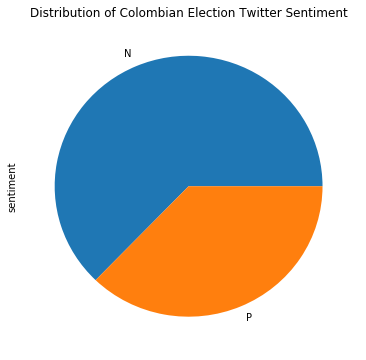

In [58]:
NB_results['sentiment'].value_counts().plot(kind='pie', title="Distribution of Colombian Election Twitter Sentiment", figsize=(6,6))

In [59]:
nb_class.show_most_informative_features(10)

Most Informative Features
            neg_r(felic) = 0.0                 P : N      =     30.5 : 1.0
             has(encant) = 1                   P : N      =     27.5 : 1.0
          has(graci,por) = 1                   P : N      =     27.5 : 1.0
           neg_r(encant) = 0.0                 P : N      =     27.5 : 1.0
           neg_l(encant) = 0.0                 P : N      =     26.5 : 1.0
           has(muy,buen) = 1                   P : N      =     23.5 : 1.0
          has(__HASH_FF) = 1                   P : N      =     20.9 : 1.0
        neg_l(__HASH_FF) = 0.0                 P : N      =     20.9 : 1.0
   emoji_(face-positive) = 'face-positive'      P : N      =     20.7 : 1.0
  has(graci,__PUNC_EXCL) = 1                   P : N      =     20.4 : 1.0


### Max Entropy

We tried with Max-entropy classifier, however better results were achieved with Naive Bayes.

In [66]:
#max_ent_classifier_0 = nltk.classify.MaxentClassifier
#max_ent_class_0 = max_ent_classifier_0.train(v_train, algorithm='GIS', max_iter=25)

In [67]:
#print ("Accuracy of the model = ", nltk.classify.accuracy(max_ent_class_0, v_validation))

# Part 2 : Tweet Text Generation 

### Preprocess Specific Column for Training

In [868]:
#re-load the data
df = pd.read_csv('df_politico_score.csv')

In [869]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,tweet,tweet_sentence,len_sentence,username,date,nlikes,tweet_word,len_word,POS,NEG,NEU,target
0,4,4,4,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,Políticos como Vizcarra y su «gente de confian...,5,PedroCastilloTe,2021-02-16 09:29:20,48,"['Políticos', 'como', 'Vizcarra', 'y', 'su', '...",29,0.000422,0.995339,0.004239,NEG
1,5,5,5,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,Por eso es su negociado con las vacunas chinas.,5,PedroCastilloTe,2021-02-16 09:29:20,48,"['Por', 'eso', 'es', 'su', 'negociado', 'con',...",10,0.000422,0.995339,0.004239,NEG
2,6,6,6,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,Las menos efectivas y más caras.,5,PedroCastilloTe,2021-02-16 09:29:20,48,"['Las', 'menos', 'efectivas', 'y', 'más', 'car...",7,0.000422,0.995339,0.004239,NEG
3,7,7,7,1.361684e+18,Políticos como Vizcarra y su «gente de confian...,Esto debe acabar ahora.,5,PedroCastilloTe,2021-02-16 09:29:20,48,"['Esto', 'debe', 'acabar', 'ahora', '.']",5,0.000422,0.995339,0.004239,NEG
4,8,8,8,1.361684e+18,"Seamos claros: estás décadas de traición, corr...","Seamos claros: estás décadas de traición, corr...",2,PedroCastilloTe,2021-02-16 09:27:12,2,"['Seamos', 'claros', ':', 'estás', 'décadas', ...",37,0.000495,0.997896,0.001609,NEG


In [870]:
#Function defintion to preprocess data

#Data Cleaning
import re
def cleaning(s):
    s = str(s)
    s = s.lower()
    s = re.sub('\W,\s',' ',s)
    s = re.sub("\d+", "", s)
    s = re.sub('\s+',' ',s)
    s = re.sub('[!#$_]', '', s)
    s = re.sub('[^\\w\\.\\s\\-]+', '', s)
    s = s.replace("https","")
    s = s.replace(",","")
    s = s.replace("[\w*"," ")
    return s

#Extract the username
user_regex = re.compile(r"@(\w+)")
def user_repl(match):
	return '__user_'+match.group(1).upper()


#Replace Emojicons for one word
emoticons = \
	[	('__EMOT_SMILEY',	[':-)', ':)', '(:', '(-:', ] )	,\
		('__EMOT_LAUGH',		[':-D', ':D', 'X-D', 'XD', 'xD', ] )	,\
		('__EMOT_LOVE',		['<3', ':\*', ] )	,\
		('__EMOT_WINK',		[';-)', ';)', ';-D', ';D', '(;', '(-;', ] )	,\
		('__EMOT_FROWN',		[':-(', ':(', '(:', '(-:', ] )	,\
		('__EMOT_CRY',		[':,(', ':\'(', ':"(', ':(('] )	,\
	]
    
def escape_paren(arr):
	return [text.replace(')', '[)}\]]').replace('(', '[({\[]') for text in arr]

def regex_union(arr):
	return '(' + '|'.join( arr ) + ')'

emoticons_regex = [ (repl, re.compile(regex_union(escape_paren(regx))) ) for (repl, regx) in emoticons ]

In [871]:
#####Apply the functions - be mindful of the order

# Clean the usernames 
df['tweetText'] = [re.sub(user_regex, user_repl, str(s)) for s in df['tweet']]

# Replace emojis
df['tweetText'] = [re.sub(user_regex, user_repl, str(s)) for s in emoticons_regex and df['tweetText']]

#Clean data - only used tweetText_for_gen column because it doesn't make sense to clean the others
df['tweetText'] = [cleaning(s) for s in df['tweetText']]

## Exploration

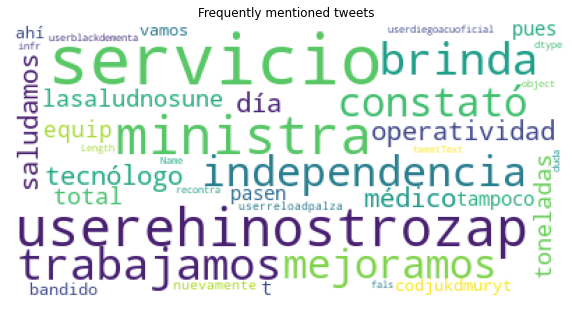

In [39]:
from nltk.corpus import stopwords
import string
#Get an idea about what words are contained
punctuation = list(string.punctuation)
stop = stopwords.words('spanish') # + punctuation + ['rt', 'via']
stop.append('d')
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(df['tweetText']))
plt.imshow(wordcloud)
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')
plt.title("Frequently mentioned tweets")
plt.show()
print(wordcloud)

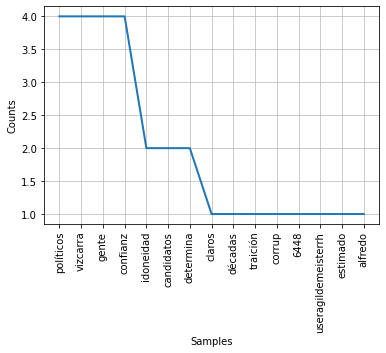

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [878]:
#Frequencies

#Get frequenies - ideally with more data since frequencies are low 
allWords = nltk.tokenize.word_tokenize(str(df['tweetText']))
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

stopwords = nltk.corpus.stopwords.words('spanish')
allWordExceptStopDist = nltk.FreqDist(w.lower() for w in allWords if w not in stopwords and len(w) > 3)
allWordExceptStopDist.plot(15)

## Text Generation

In [883]:
# generate a sequence from the model
def generate_seq(model, tokenizer, seed_text, n_words):
	in_text, result = seed_text, seed_text
	# generate a fixed number of words
	for _ in range(n_words):
        
		# encode the text as integer
		encoded = tokenizer.texts_to_sequences([in_text])[0]
		encoded = array(encoded)
        
		# predict a word in the vocabulary
		yhat = model.predict_classes(encoded, verbose=0)
        
		# map predicted word index to word
		out_word = ''
		for word, index in tokenizer.word_index.items():
			if index == yhat:
				out_word = word
				break
		# append to input
		in_text, result = out_word, result + ' ' + out_word
	return result

In [873]:
# source text
data = str(df['tweetText'])

# integer encode text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([data])
encoded = tokenizer.texts_to_sequences([data])[0] #return encoded words in array

In [884]:
# determine the vocabulary size
vocab_size = len(tokenizer.word_index) + 1 #dictionary with frequencies of unique words
print('Vocabulary Size: %d' % vocab_size)

# create word -> word sequences
sequences = list()
for i in range(1, len(encoded)):
	sequence = encoded[i-1:i+1]
	sequences.append(sequence)
print('Total Sequences: %d' % len(sequences))

# split into X and y elements
sequences = array(sequences)
X, y = sequences[:,0],sequences[:,1]

Vocabulary Size: 55
Total Sequences: 90


In [885]:
from keras.layers import Dropout

# one hot encode outputs
y = to_categorical(y, num_classes=vocab_size)

# define model
model = Sequential()
model.add(Embedding(vocab_size, 10, input_length=1))
model.add(Dropout(0.1, input_shape=((468, 321))))
model.add(LSTM(50))
model.add(Dropout(0.1))
model.add(Dense(vocab_size, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1, 10)             550       
                                                                 
 dropout_2 (Dropout)         (None, 1, 10)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                12200     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 55)                2805      
                                                                 
Total params: 15,555
Trainable params: 15,555
Non-trainable params: 0
_________________________________________________________________
None


In [886]:
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(X, y, epochs=500, verbose=2)

Epoch 1/500
3/3 - 2s - loss: 4.0066 - accuracy: 0.0333 - 2s/epoch - 561ms/step
Epoch 2/500
3/3 - 0s - loss: 4.0042 - accuracy: 0.1111 - 11ms/epoch - 4ms/step
Epoch 3/500
3/3 - 0s - loss: 4.0025 - accuracy: 0.1889 - 12ms/epoch - 4ms/step
Epoch 4/500
3/3 - 0s - loss: 4.0006 - accuracy: 0.1333 - 11ms/epoch - 4ms/step
Epoch 5/500
3/3 - 0s - loss: 3.9989 - accuracy: 0.1000 - 12ms/epoch - 4ms/step
Epoch 6/500
3/3 - 0s - loss: 3.9968 - accuracy: 0.1111 - 14ms/epoch - 5ms/step
Epoch 7/500
3/3 - 0s - loss: 3.9948 - accuracy: 0.1111 - 12ms/epoch - 4ms/step
Epoch 8/500
3/3 - 0s - loss: 3.9927 - accuracy: 0.0889 - 12ms/epoch - 4ms/step
Epoch 9/500
3/3 - 0s - loss: 3.9907 - accuracy: 0.0889 - 12ms/epoch - 4ms/step
Epoch 10/500
3/3 - 0s - loss: 3.9889 - accuracy: 0.0889 - 13ms/epoch - 4ms/step
Epoch 11/500
3/3 - 0s - loss: 3.9859 - accuracy: 0.0889 - 13ms/epoch - 4ms/step
Epoch 12/500
3/3 - 0s - loss: 3.9832 - accuracy: 0.0889 - 12ms/epoch - 4ms/step
Epoch 13/500
3/3 - 0s - loss: 3.9799 - accuracy: 

Epoch 104/500
3/3 - 0s - loss: 2.1754 - accuracy: 0.4667 - 13ms/epoch - 4ms/step
Epoch 105/500
3/3 - 0s - loss: 2.1229 - accuracy: 0.4889 - 12ms/epoch - 4ms/step
Epoch 106/500
3/3 - 0s - loss: 2.1198 - accuracy: 0.5000 - 13ms/epoch - 4ms/step
Epoch 107/500
3/3 - 0s - loss: 2.0932 - accuracy: 0.5000 - 14ms/epoch - 5ms/step
Epoch 108/500
3/3 - 0s - loss: 2.1105 - accuracy: 0.4667 - 12ms/epoch - 4ms/step
Epoch 109/500
3/3 - 0s - loss: 2.0589 - accuracy: 0.5111 - 12ms/epoch - 4ms/step
Epoch 110/500
3/3 - 0s - loss: 2.0313 - accuracy: 0.4889 - 12ms/epoch - 4ms/step
Epoch 111/500
3/3 - 0s - loss: 2.0690 - accuracy: 0.5000 - 11ms/epoch - 4ms/step
Epoch 112/500
3/3 - 0s - loss: 2.0387 - accuracy: 0.5222 - 12ms/epoch - 4ms/step
Epoch 113/500
3/3 - 0s - loss: 2.0121 - accuracy: 0.5333 - 14ms/epoch - 5ms/step
Epoch 114/500
3/3 - 0s - loss: 1.9935 - accuracy: 0.5556 - 12ms/epoch - 4ms/step
Epoch 115/500
3/3 - 0s - loss: 1.9989 - accuracy: 0.5556 - 13ms/epoch - 4ms/step
Epoch 116/500
3/3 - 0s - los

3/3 - 0s - loss: 0.8546 - accuracy: 0.8222 - 11ms/epoch - 4ms/step
Epoch 206/500
3/3 - 0s - loss: 0.8895 - accuracy: 0.8444 - 12ms/epoch - 4ms/step
Epoch 207/500
3/3 - 0s - loss: 0.8712 - accuracy: 0.8000 - 12ms/epoch - 4ms/step
Epoch 208/500
3/3 - 0s - loss: 0.8952 - accuracy: 0.8222 - 11ms/epoch - 4ms/step
Epoch 209/500
3/3 - 0s - loss: 0.8829 - accuracy: 0.8222 - 12ms/epoch - 4ms/step
Epoch 210/500
3/3 - 0s - loss: 0.8182 - accuracy: 0.8556 - 11ms/epoch - 4ms/step
Epoch 211/500
3/3 - 0s - loss: 0.8435 - accuracy: 0.8444 - 11ms/epoch - 4ms/step
Epoch 212/500
3/3 - 0s - loss: 0.8257 - accuracy: 0.8222 - 12ms/epoch - 4ms/step
Epoch 213/500
3/3 - 0s - loss: 0.8071 - accuracy: 0.8222 - 11ms/epoch - 4ms/step
Epoch 214/500
3/3 - 0s - loss: 0.8367 - accuracy: 0.8333 - 13ms/epoch - 4ms/step
Epoch 215/500
3/3 - 0s - loss: 0.8515 - accuracy: 0.8222 - 12ms/epoch - 4ms/step
Epoch 216/500
3/3 - 0s - loss: 0.8138 - accuracy: 0.8778 - 12ms/epoch - 4ms/step
Epoch 217/500
3/3 - 0s - loss: 0.8144 - ac

Epoch 307/500
3/3 - 0s - loss: 0.4771 - accuracy: 0.9000 - 13ms/epoch - 4ms/step
Epoch 308/500
3/3 - 0s - loss: 0.4137 - accuracy: 0.8889 - 14ms/epoch - 5ms/step
Epoch 309/500
3/3 - 0s - loss: 0.4455 - accuracy: 0.8667 - 13ms/epoch - 4ms/step
Epoch 310/500
3/3 - 0s - loss: 0.4530 - accuracy: 0.9000 - 14ms/epoch - 5ms/step
Epoch 311/500
3/3 - 0s - loss: 0.4526 - accuracy: 0.8667 - 12ms/epoch - 4ms/step
Epoch 312/500
3/3 - 0s - loss: 0.4949 - accuracy: 0.8667 - 14ms/epoch - 5ms/step
Epoch 313/500
3/3 - 0s - loss: 0.4319 - accuracy: 0.8889 - 13ms/epoch - 4ms/step
Epoch 314/500
3/3 - 0s - loss: 0.4391 - accuracy: 0.9000 - 14ms/epoch - 5ms/step
Epoch 315/500
3/3 - 0s - loss: 0.4737 - accuracy: 0.8667 - 14ms/epoch - 5ms/step
Epoch 316/500
3/3 - 0s - loss: 0.4465 - accuracy: 0.8778 - 13ms/epoch - 4ms/step
Epoch 317/500
3/3 - 0s - loss: 0.5015 - accuracy: 0.8556 - 15ms/epoch - 5ms/step
Epoch 318/500
3/3 - 0s - loss: 0.4684 - accuracy: 0.8444 - 13ms/epoch - 4ms/step
Epoch 319/500
3/3 - 0s - los

3/3 - 0s - loss: 0.3891 - accuracy: 0.8667 - 12ms/epoch - 4ms/step
Epoch 409/500
3/3 - 0s - loss: 0.3634 - accuracy: 0.8889 - 14ms/epoch - 5ms/step
Epoch 410/500
3/3 - 0s - loss: 0.3819 - accuracy: 0.8556 - 14ms/epoch - 5ms/step
Epoch 411/500
3/3 - 0s - loss: 0.3720 - accuracy: 0.8333 - 12ms/epoch - 4ms/step
Epoch 412/500
3/3 - 0s - loss: 0.3179 - accuracy: 0.8556 - 13ms/epoch - 4ms/step
Epoch 413/500
3/3 - 0s - loss: 0.3103 - accuracy: 0.9000 - 15ms/epoch - 5ms/step
Epoch 414/500
3/3 - 0s - loss: 0.3197 - accuracy: 0.8889 - 14ms/epoch - 5ms/step
Epoch 415/500
3/3 - 0s - loss: 0.3385 - accuracy: 0.8889 - 14ms/epoch - 5ms/step
Epoch 416/500
3/3 - 0s - loss: 0.3439 - accuracy: 0.9111 - 13ms/epoch - 4ms/step
Epoch 417/500
3/3 - 0s - loss: 0.3262 - accuracy: 0.8778 - 14ms/epoch - 5ms/step
Epoch 418/500
3/3 - 0s - loss: 0.3359 - accuracy: 0.8778 - 14ms/epoch - 5ms/step
Epoch 419/500
3/3 - 0s - loss: 0.3062 - accuracy: 0.9222 - 14ms/epoch - 5ms/step
Epoch 420/500
3/3 - 0s - loss: 0.3256 - ac

**Accuracy is not so high but enough for our purposes!**

# Generate your text here!

**It is only able to generate the sequence for the words that are part of the vocabulary. We are currently testing in Beta! **

In [887]:
#pull some frequent words from the vocabulary
allWordExceptStopDist.most_common(10)

[('políticos', 4),
 ('vizcarra', 4),
 ('gente', 4),
 ('confianz', 4),
 ('idoneidad', 2),
 ('candidatos', 2),
 ('determina', 2),
 ('claros', 1),
 ('décadas', 1),
 ('traición', 1)]

In [889]:
string = input("What do you want to test? ")
print(generate_seq(model, tokenizer, string , 5)) #give me 5 words in a sequence

What do you want to test? presidente


AttributeError: 'Sequential' object has no attribute 'predict_classes'



While sentence does not follow correct syntactic rules it serves as an indicator what topics are sourrounding the presidential candidate Duque. It is related to the lack of jornalism for some years. A news agency could pick this hint up and investigate further. 

### Thank you for reading!